# Natural Language Processing


following the tutorial available at <a href="https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk">DataCamp</a>

### 1. Initialising 

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# nltk.download()

In [4]:
# Check working directory
home = os.getcwd()
home

'C:\\Users\\emlyg\\Programming\\NLP'

### 2. Importing data

This data set is found on <a href="https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data">Kaggle</a>

It ranks the sentiment of movie reviews marking them as:
* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

In [5]:
# Set path for data source
train_data_path = os.path.join(home, "data", "train.tsv", "train.tsv")

#Read in data
data = pd.read_csv(train_data_path, sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
# Get basic stats on dataset
print(data.info())
print("\nFrequency of each sentiment:\n", data.Sentiment.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None

Frequency of each sentiment:
 2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


Text(0, 0.5, 'Number of Reviews')

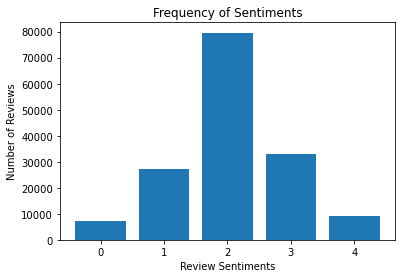

In [7]:
# Graph frequency of Sentiments within dataset
Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.title("Frequency of Sentiments")
plt.xlabel("Review Sentiments")
plt.ylabel("Number of Reviews")

### 3. Training Models to Understand Sentiment

This model uses the Bag-of-Words model to classify data based on the occurrence of words in the text

1. create count vectors for each review counting the frequency of each word in each review
2. divide the data into a training set and a test set
3. fit the model onto the training data 
4. use the model to predict the test data

#### Multinomial Naive Bayes classifier:
* calculates the probabilities of each classification for a given piece of text and assigns it the one with the highest probability
* The features of each piece of text are its word frequencies
* Uses Bayes' Theorem of conditional probability to produce probabilities of classifications
* Assume each word in sentence is independent of others - probability of sentence = probability of each word in sentence multiplied together (This is the <i>naive</i> part)
* Use Laplace smoothing to remove division or multiplication by 0

In [8]:
# Tokenizes only words and digit terms from the documents (i.e. ignores symbols)
token = RegexpTokenizer(r'[a-zA-z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)

# Fits the model to the data contaned in the Phrase column of the dataset (i.e. the text content of the reviews)
text_counts = cv.fit_transform(data['Phrase'])

In [9]:
# Splits the data into a training set and a test set using the count
# vecotrs found above and the Sentiment column of the dataset.
X_train, X_test, y_train, y_test = train_test_split(
   text_counts, data['Sentiment'], random_state = 1)

In [10]:
# Fits the model to the trainng data
classifier = MultinomialNB().fit(X_train, y_train)

# Uses the model to predict the outcome of the test data
predicted = classifier.predict(X_test)

# Measures the accurracy of the prediction
print("MultinomialNB Accuracy:",accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6048699218249391


#### Implement function to build and assess such a model

In [13]:
def NBModel(data_phrases, data_sentiment, ran_state):
    token = RegexpTokenizer(r'[a-zA-z0-9]+')
    cv = CountVectorizer(lowercase=True, stop_words='english', 
                         ngram_range = (1,1), tokenizer = token.tokenize)
    text_counts = cv.fit_transform(data_phrases)
    X_train, X_test, y_train, y_test = train_test_split(
        text_counts, data_sentiment, random_state = ran_state)
    classifier = MultinomialNB().fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print("MultinomialNB Accuracy:", 
          accuracy_score(y_test, predicted))

In [14]:
NBModel(data['Phrase'], data['Sentiment'], 1)

MultinomialNB Accuracy: 0.6048699218249391


#### TF-IDF:
* normalises document term matrix and identifies signature words
* stands for term frequency - inverse document frequency 
* term frequence = log(1 + no. occurrences of word in a document)
* inverse document frequency = log((no. documents) / (no. documents in which word occurs))
* tf-idf = product of tf and idf

In [16]:
# Create word vectors for each piece of text using tf-idf 
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

# Splits new data into test and training sets
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(
   text_tf, data['Sentiment'], test_size = 0.3, random_state = 123)

In [18]:
# Train the model and assess the accuracy of its predictions
clf_tf = MultinomialNB().fit(X_tf_train, y_tf_train)
predicted_tf = clf_tf.predict(X_tf_test)
print("MultinomialNB Accuracy using TF-IDF:",accuracy_score(
    y_tf_test, predicted_tf))

MultinomialNB Accuracy using TF-IDF: 0.5865265496176684


In [19]:
#Defining function to reuse above process
def TFIDFModel(data_phrases, data_sentiment, ran_state):
    tf = TfidfVectorizer()
    text_tf = tf.fit_transform(data_phrases)
    X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(
        text_tf, data_sentiment, test_size = 0.3, random_state = ran_state)
    clf_tf = MultinomialNB().fit(X_tf_train, y_tf_train)
    predicted_tf = clf_tf.predict(X_tf_test)
    print("MultinomialNB Accuracy using TF-IDF:",accuracy_score(
        y_tf_test, predicted_tf))

In [20]:
TFIDFModel(data['Phrase'], data['Sentiment'], 123)

MultinomialNB Accuracy using TF-IDF: 0.5865265496176684


### 4. Improve Accuracy
The following methods will be implemented to hopefully improve the accuracy of the above models:
* Removal of stopwords
* Lemmatization

In [24]:
clean_phrases = []
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# remove stopwords from each phrase, and lemmatize each word
for phrase in data['Phrase']:
    clean_phrase = []
    for word in word_tokenize(phrase):
        if not word in stop_words:
            clean_phrase.append(lemmatizer.lemmatize(word))
    # revert list of strings to a single string
    clean_phrases.append(" ".join(clean_phrase))

In [25]:
NBModel(clean_phrases, data['Sentiment'], 1)

MultinomialNB Accuracy: 0.6068178905549148


In [26]:
TFIDFModel(clean_phrases, data['Sentiment'], 123)

MultinomialNB Accuracy using TF-IDF: 0.5870818915801614


* While this process has made some improvement to the accuracy, it is extremely minor

### 5. Train a new model

#### Passive Aggressive Classifier
* Updates model for misclassifications

In [87]:
def PACModel(phrases, sentiments, ran_state, ngram_num, max_df_num):
    
    # Initialize vectorizer
    tf = TfidfVectorizer(stop_words = 'english', max_df = max_df_num, ngram_range = (1, ngram_num))
    tf_phrases = tf.fit_transform(phrases)
    
    # Split the data
    train_x, test_x, train_y, test_y = train_test_split(
        tf_phrases, sentiments, test_size = 0.3, random_state = ran_state)
    
    # Initialize classifier
    pac_classifier = PassiveAggressiveClassifier().fit(
        train_x, train_y)
    
    # Predict test data
    predicted = pac_classifier.predict(test_x)
    print("PassiveAggressive Accuracy using TF-IDF:",accuracy_score(
        test_y, predicted))

In [52]:
train_x, test_x, train_y, test_y = train_test_split(
    clean_phrases, data['Sentiment'], 
    test_size = 0.3, random_state = 1)

In [94]:
print("\nMessy data and no n-grams: ")
PACModel(data['Phrase'], data['Sentiment'], 1, 1, 0.5)
print("\nClean data and no n-grams: ")
PACModel(clean_phrases, data['Sentiment'], 1, 1, 0.5)
print("\nMessy data and n-grams: ")
PACModel(data['Phrase'], data['Sentiment'], 1, 2, 0.5)
print("\nClean data and n-grams: ")
PACModel(clean_phrases, data['Sentiment'], 1, 2, 0.5)


Messy data and no n-grams: 
PassiveAggressive Accuracy using TF-IDF: 0.6106625656798668

Clean data and no n-grams: 
PassiveAggressive Accuracy using TF-IDF: 0.6043829296424452

Messy data and n-grams: 
PassiveAggressive Accuracy using TF-IDF: 0.6224101841172198

Clean data and n-grams: 
PassiveAggressive Accuracy using TF-IDF: 0.6208936733734888
